In [1]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
# from FourSquareAPI import FourSquareAPI
import folium 
from IPython.display import Image 
from IPython.core.display import HTML 
import matplotlib.cm as cm
import matplotlib.colors as colors
import scipy.stats as stats
import seaborn as sns

%matplotlib inline 
mpl.style.use('ggplot')

In [2]:
df_split= pd.read_csv('fast-food-restaurants/cleaned-data-all.csv')
df_split.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
df_split.head(10)

In [3]:
df_cleaned_name = df_split.groupby('cleaned_name')
df_province = df_split.groupby('province')

In [ ]:
df_province.get_group('CA').shape

In [25]:
len(df_province['province'].count())

52

In [26]:
province_75q

499.25

In [24]:
province_75q = df_province['province'].count().quantile(0.75)
x = list(df_province.groups.keys())
df_top25 = df_province['province'].count()[df_province['province'].count() > province_75q]
len(df_top25)

13

In [27]:
df_200_750 = df_province['province'].count()[(df_province['province'].count() > 200) & (df_province['province'].count() < 500)]

In [28]:
len(df_200_750)

20

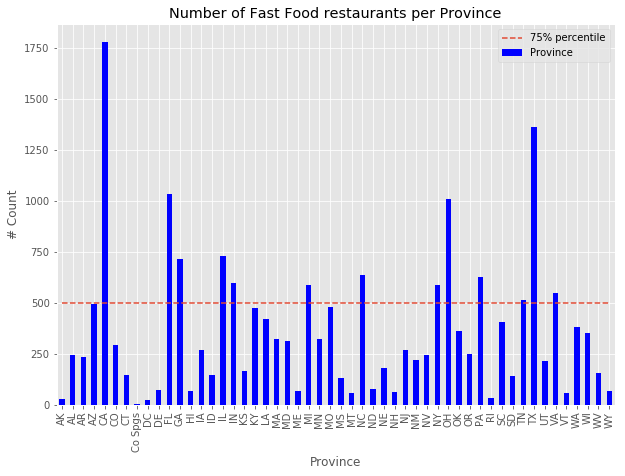

Provinces which lie in the top 25% of the restaurant distribution are:  ['CA' 'FL' 'GA' 'IL' 'IN' 'MI' 'NC' 'NY' 'OH' 'PA' 'TN' 'TX' 'VA']


In [19]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
fig,ax = plt.subplots()
df_province['province'].count().plot(kind='bar',
                                     ax=ax, 
                                     color='blue',
                                     label='Province')
ax.plot(x,[province_75q]*len(x), label='75% percentile', linestyle='--')
legend = ax.legend(loc='upper right')
plt.title('Number of Fast Food restaurants per Province')
plt.xlabel('Province')
plt.ylabel('# Count')
plt.show()
print('Provinces which lie in the top 25% of the restaurant distribution are: ', \
      df_top25.index.values)

Text(0.5, 0, 'Count')

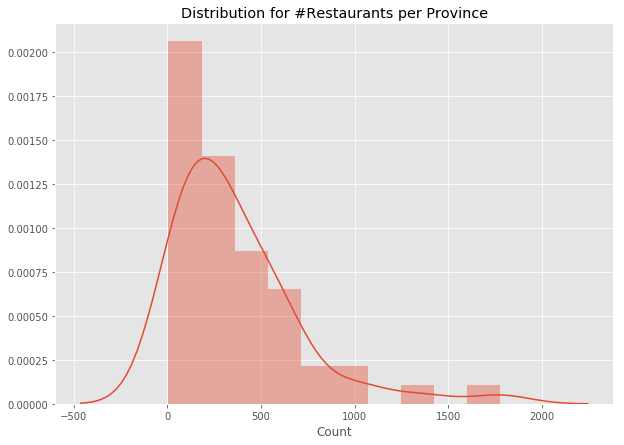

In [20]:
# https://seaborn.pydata.org/tutorial/distributions.html
X = df_province['province'].count().values
sns.distplot(X);
plt.title('Distribution for #Restaurants per Province')
plt.xlabel('Count')

In [31]:
df_province_meta = pd.read_csv('province_meta_data.csv')
df_province_meta.drop('Unnamed: 0', axis=1,inplace=True)
df_province_meta['rest_per_km2'] = df_province_meta['restaurants_in_province']/df_province_meta['area_km2']
df_province_meta['rest_per_1000people'] = df_province_meta['restaurants_in_province']/df_province_meta['population'] * 1000
df_province_meta

,area_km2,population,province,is_tourist,restaurants_in_province,rest_per_km2,rest_per_1000people
0,403466,39557045,CA,1,1778,0.004407,0.044948
1,138887,21299325,FL,1,1033,0.007438,0.048499
2,148959,10519475,GA,1,715,0.004800,0.067969
3,143793,12741080,IL,0,728,0.005063,0.057138
4,92789,6691878,IN,0,599,0.006456,0.089511
5,146435,9995915,MI,0,586,0.004002,0.058624
6,125920,10383620,NC,0,635,0.005043,0.061154
7,122057,19542209,NY,1,588,0.004817,0.030089
8,105829,11689442,OH,0,1009,0.009534,0.086317
9,115883,12807060,PA,0,628,0.005419,0.049035


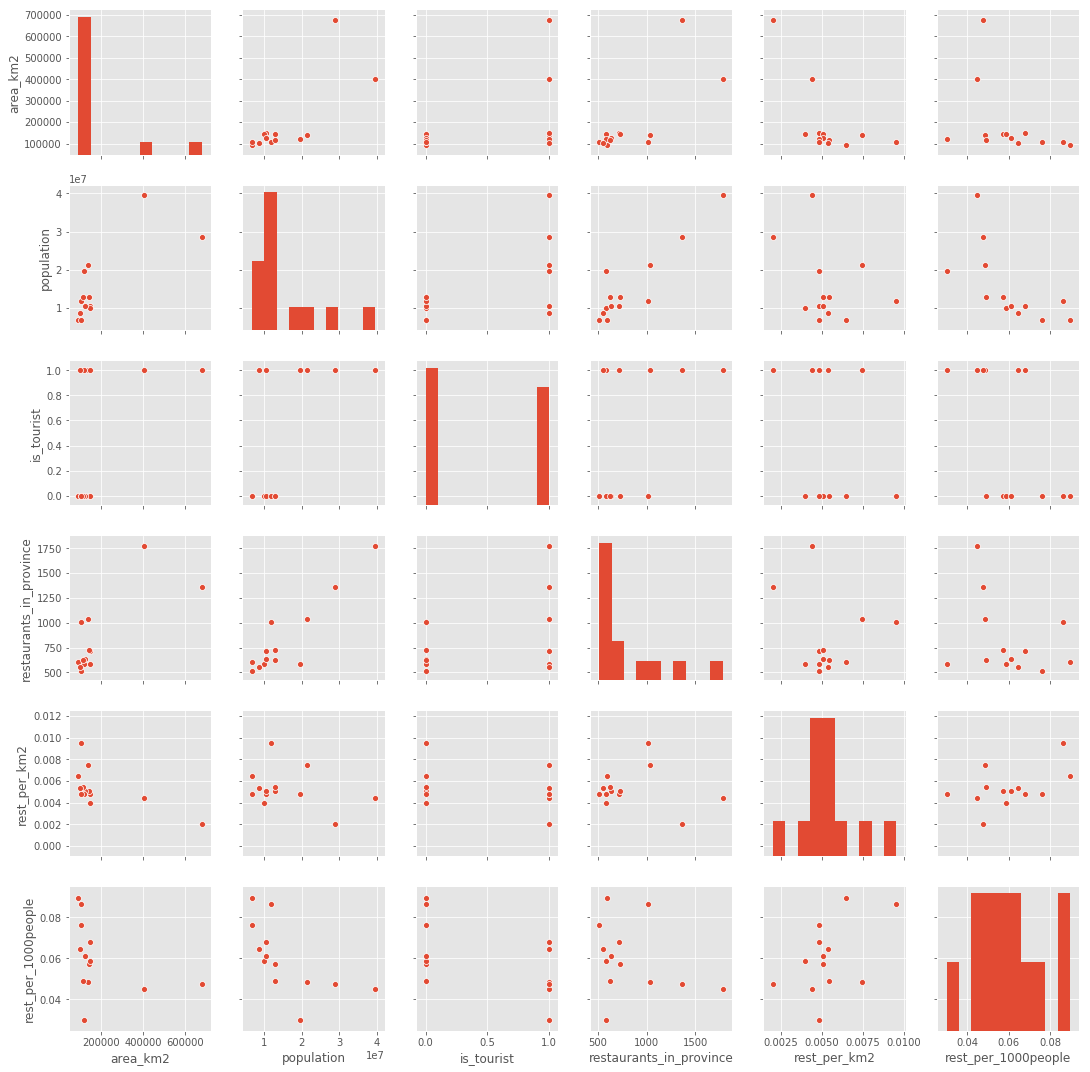

In [32]:
sns.pairplot(df_province_meta)